### About Cab Comapny (Masked)

- Cab Company is a prominent mobility platform in India and one of the largest ride-hailing companies globally. It operates in more than 250 cities, serving customers in India, Australia, New Zealand, and the UK. 

- Through the Cab Company app, customers can easily access a diverse fleet of vehicles, including bikes, auto-rickshaws, metered taxis, and cabs. This wide array of options offers convenience and transparency to hundreds of millions of consumers.

- Additionally, Cab Company's platform has empowered over 1.5 million driver-partners, providing them with opportunities to earn and serve the transportation needs of countless people.

### Problem Statement

- Recruiting and retaining drivers is seen as a significant challenge for Cab Company. Churn among drivers is high, and it’s very easy for drivers to stop working for the service on the fly or jump to competitors depending on the rates.

- As the company gets bigger, the high churn could become a more substantial problem. To find new drivers, Cab Company is casting a wide net, including people who don’t have cars for jobs. However, this acquisition is really costly. Losing drivers frequently impacts the morale of the organization, and acquiring new drivers is more expensive than retaining existing ones.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing and reading the dataset
df = pd.read_csv('cab_company.csv')
df.head(20)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


### Basic data exploration

In [3]:
# Structure of data
df.shape

(19104, 14)

In [4]:
# Columns of data
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [5]:
# Characteristics of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [6]:
# Unique attributes for each columns
df.nunique()

Unnamed: 0              19104
MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [7]:
# Statistical information for data
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [8]:
# Checking for missing values in data
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [9]:
# Validating duplicated data
df.duplicated().sum()

0

### Observation

- The dataset contains 19,104 rows and 14 columns.
- There are missing values in the 'Age' and 'Gender' columns.
- The 'LastWorkingDate' column has a significant number of missing values (17,488 out of 19,104).
- The 'Age' column has a mean age of approximately 34.67 with a minimum age of 21 and a maximum age of 58.
- The 'Income' column has a mean income of approximately 65,652 with a minimum income of 10,747 and a maximum income of 188,418.
- The 'Total Business Value' column has a mean value of approximately 571,662 with a minimum value of -6,000,000 and a maximum value of 33,747,720.
- The majority of employees have 'Joining Designation' level 1 and 'Grade' level 2.
- There are no duplicated entries in the dataset.

### Data Pre-processing

In [10]:
# Removing unwanted columns
df = df.drop('Unnamed: 0', axis=1)

In [11]:
# Handling missing values for 'Age' column using KNN imputaion method
from sklearn.impute import KNNImputer

# Perform KNN imputation only on the 'Age' column
data_to_impute = df[['Age']]
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(data_to_impute)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=['Age'])
df['Age'] = imputed_df['Age']

In [12]:
# Handling missing values for 'Gender' column
df['Gender'].fillna('Not Specified', inplace=True)

In [13]:
# Convert date-like features to datetime data type
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

### Feature Engineering

In [14]:
# Calculate the difference between consecutive quarterly ratings for each driver
df['Rating_Increased'] = (df.groupby('Driver_ID')['Quarterly Rating']
                          .diff()
                          .gt(0)
                          .astype(int))

# If the first entry for a driver has NaN difference, set it to 0 (no rating increase)
df['Rating_Increased'].fillna(0, inplace=True)

# Calculate the difference between consecutive income values for each driver
df['Income_Increased'] = (df.groupby('Driver_ID')['Income']
                          .diff()
                          .gt(0)
                          .astype(int))

# If the first entry for a driver has NaN difference, set it to 0 (no income increase)
df['Income_Increased'].fillna(0, inplace=True)

In [15]:
# Create the target column
df['Is_Active'] = df['LastWorkingDate'].isnull().astype(int)

# Drop 'LastWorkingDate' if it's no longer needed for analysis
df.drop('LastWorkingDate', axis=1, inplace=True)

In [16]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,Rating_Increased,Income_Increased,Is_Active
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,1,1,2381060,2,0,0,1
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,1,1,-665480,2,0,0,1
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,1,1,0,2,0,0,0
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,2,2,0,1,0,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,2,2,0,1,0,0,1


### Grouping and aggregating the data according to DriverID

In [17]:
# Create a group dictionary to aggregate the data
group_dict = {
    'Age': 'mean',
    'Gender': 'first',
    'City': 'first',
    'Education_Level': 'max',
    'Income': 'mean',
    'Joining Designation': 'first',
    'Grade': lambda x: x.mode().iat[0],
    'Total Business Value': 'sum',
    'Quarterly Rating': lambda x: x.mode().iat[0],
    'Rating_Increased': 'max',
    'Income_Increased': 'max',
    'Is_Active': 'max',
}

In [18]:
grouped_data = df.groupby('Driver_ID').agg(group_dict).reset_index()

In [19]:
grouped_data.shape

(2381, 13)

In [20]:
grouped_data.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Rating_Increased,Income_Increased,Is_Active
0,1,28.0,0.0,C23,2,57387.0,1,1,1715580,2,0,0,1
1,2,31.0,0.0,C7,2,67016.0,2,2,0,1,0,0,1
2,4,43.0,0.0,C13,2,65603.0,2,2,350000,1,0,0,1
3,5,29.0,0.0,C9,0,46368.0,1,1,120360,1,0,0,1
4,6,31.0,1.0,C11,1,78728.0,3,3,1265000,2,1,0,1


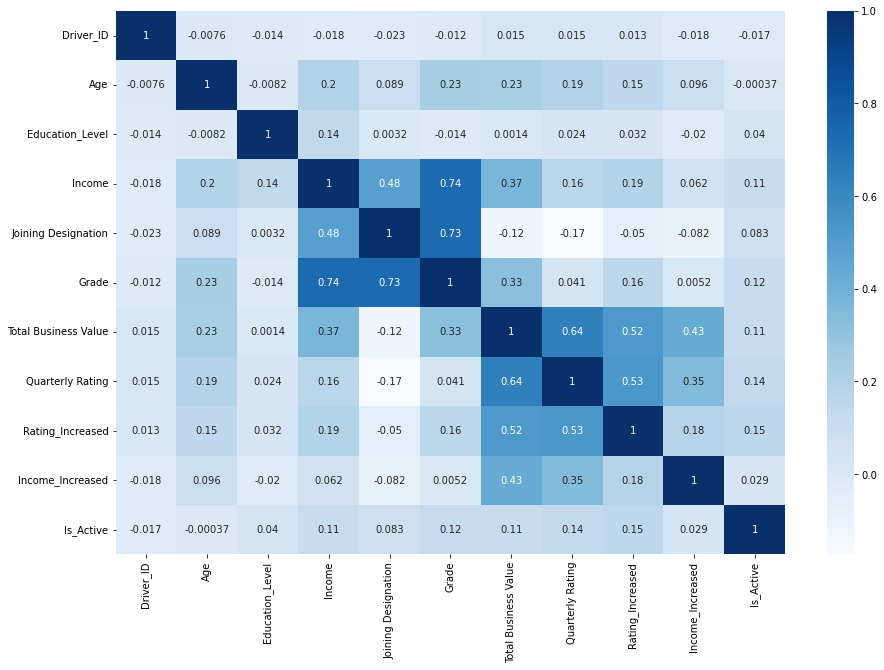

In [21]:
# Co-relation of data using heatmap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(grouped_data.corr(),annot=True, cmap="Blues")
plt.show()

### Observation

- From the above heatmap we can say that variables Grade and Income are highly corelated.
- Also Joining Designation and Grade are higly corelated.

### Outliers detection using box-plots

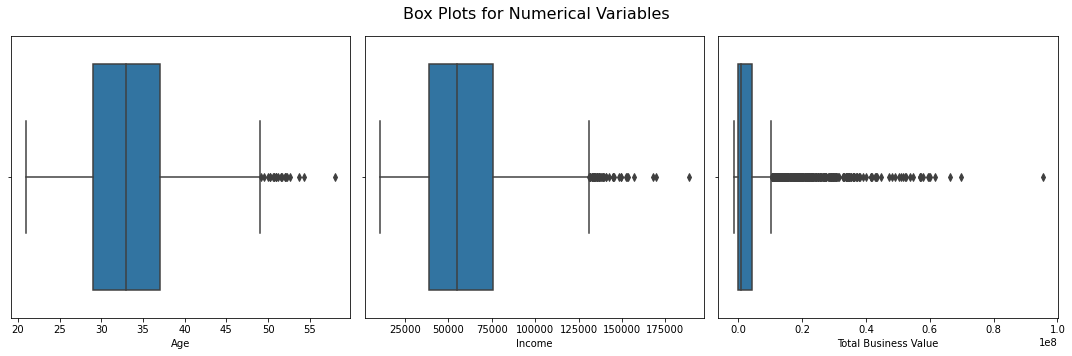

In [22]:
# Plot box plot for each numerical variable in a 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Box Plots for Numerical Variables", fontsize=16)

num_var = ['Age', 'Income', 'Total Business Value']

for i, var in enumerate(num_var):
    sns.boxplot(data=grouped_data, x=var, ax=axes[i], orient='h')
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()

### Outliers treatment using z-score method

In [23]:
# Outliers treatment using z-score method

for col in num_var:
    mean = grouped_data[col].mean()
    std = grouped_data[col].std()

# Calculate the upper and lower limits for outliers (3 times the standard deviation from the mean)
    upper_limit = mean + 3 * std
    lower_limit = mean - 3 * std

# Filter the DataFrame to retain only the data points within the upper and lower limits
    grouped_data = grouped_data[(grouped_data[col] < upper_limit) & (grouped_data[col] > lower_limit)]

In [24]:
# Structure of the data after outliers removal
grouped_data.shape

(2292, 13)

### Univariate analysis

In [25]:
#Categorizing the variables
cat_var = ['Gender', 'City', 'Education_Level', 'Grade', 'Joining Designation', 'Quarterly Rating', 'Rating_Increased', 'Income_Increased', 'Is_Active']
num_var = ['Age', 'Income', 'Total Business Value']

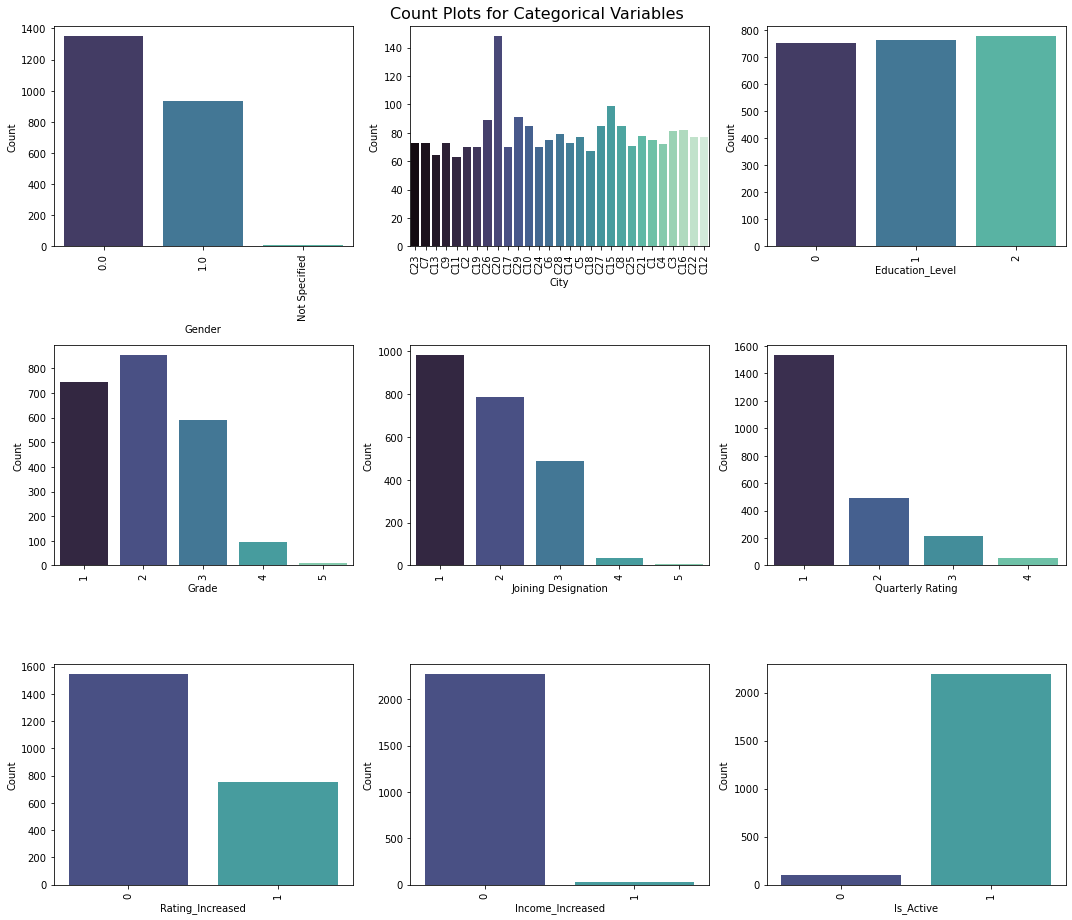

In [26]:
# Count plots for each categorical variable
fig, axes = plt.subplots(3, 3, figsize=(15, 13))
fig.suptitle("Count Plots for Categorical Variables", fontsize=16)

for i, cat_var in enumerate(['Gender', 'City', 'Education_Level', 'Grade', 'Joining Designation', 'Quarterly Rating', 'Rating_Increased', 'Income_Increased', 'Is_Active']):
    row = i // 3
    col = i % 3
    sns.countplot(data=grouped_data, x=cat_var, palette = 'mako', ax=axes[row, col])
    axes[row, col].set_xlabel(cat_var)
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [27]:
# Calculate value counts and percentages for each column
cat_var = ['Gender', 'City', 'Education_Level', 'Grade', 'Joining Designation', 'Quarterly Rating', 'Rating_Increased', 'Income_Increased', 'Is_Active']
for column in cat_var:
    value_counts = grouped_data[column].value_counts()
    total_count = len(grouped_data[column])
    percentages = (value_counts / total_count) * 100
    
    print("Value counts and percentages for variable", column, ":\n")
    for value, count, percentage in zip(value_counts.index, value_counts.values, percentages.values):
        print(value, ":", count, "(", round(percentage, 2), "%)")
    print()

Value counts and percentages for variable Gender :

0.0 : 1350 ( 58.9 %)
1.0 : 936 ( 40.84 %)
Not Specified : 6 ( 0.26 %)

Value counts and percentages for variable City :

C20 : 148 ( 6.46 %)
C15 : 99 ( 4.32 %)
C29 : 91 ( 3.97 %)
C26 : 89 ( 3.88 %)
C8 : 85 ( 3.71 %)
C10 : 85 ( 3.71 %)
C27 : 85 ( 3.71 %)
C16 : 82 ( 3.58 %)
C3 : 81 ( 3.53 %)
C28 : 79 ( 3.45 %)
C21 : 78 ( 3.4 %)
C5 : 77 ( 3.36 %)
C22 : 77 ( 3.36 %)
C12 : 77 ( 3.36 %)
C6 : 75 ( 3.27 %)
C1 : 75 ( 3.27 %)
C7 : 73 ( 3.18 %)
C14 : 73 ( 3.18 %)
C9 : 73 ( 3.18 %)
C23 : 73 ( 3.18 %)
C4 : 72 ( 3.14 %)
C25 : 71 ( 3.1 %)
C24 : 70 ( 3.05 %)
C17 : 70 ( 3.05 %)
C19 : 70 ( 3.05 %)
C2 : 70 ( 3.05 %)
C18 : 67 ( 2.92 %)
C13 : 64 ( 2.79 %)
C11 : 63 ( 2.75 %)

Value counts and percentages for variable Education_Level :

2 : 777 ( 33.9 %)
1 : 762 ( 33.25 %)
0 : 753 ( 32.85 %)

Value counts and percentages for variable Grade :

2 : 853 ( 37.22 %)
1 : 743 ( 32.42 %)
3 : 591 ( 25.79 %)
4 : 95 ( 4.14 %)
5 : 10 ( 0.44 %)

Value counts and percent

### Observation

- In total, 58.9% of employees are males (gender 0.0) while 40.84% are females (gender 1.0) and six employees (0.26%) have not specified their gender.
- City C20 has the highest number of employees with 148 (6.46%), followed by City C15 with 99 (4.32%). City C29 and C26 are next with 91 and 89 employees, respectively (3.97% and 3.88%).
- 33.9% of employees fall under education level 2(Graduate), 33.25% of employees fall under education level 1(12+), 32.85% of employees fall under education level 0(10+).
- 37.22% of employees have grade 2 followed by 32.42% have grade 1 and only 0.44% have grade 5.
- 42.76% joined with designation level 1, 34.34% with designation level 2, and 21.16% with designation level 3. The remaining designations (4 and 5) have relatively lower representation.
- Among the drivers 66.88% received a rating of 1, 21.38% received a rating of 2, 9.25% received a rating of 3, and 2.49% received a rating of 4.
- Regarding rating changes, 67.32% of employees did not experience an increase, while 32.68% had their rating increased.
- Majority of employees, 99.04%, did not receive an income increase, while only a small percentage of 0.96% had their income increased.
- In terms of employment status, 95.59% of employees are considered active as they don't have last working date, whereas 4.41% are inactive, indicating they have left the company.

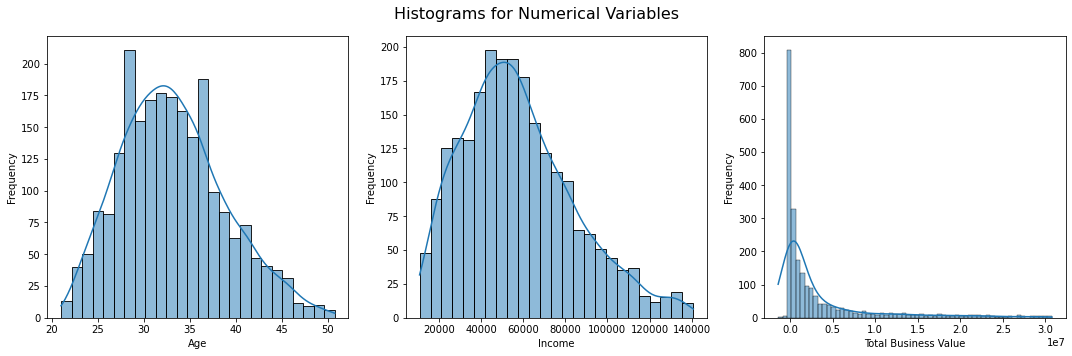

In [28]:
# Plot histogram for each numerical variable in a 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Histograms for Numerical Variables", fontsize=16)

num_var = ['Age', 'Income', 'Total Business Value']

for i, var in enumerate(num_var):
    sns.histplot(data=grouped_data, x=var, kde=True, ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Observation

- The distribution for the variables Age and Income seems to be distributed normally.
- The distribution for Total Business Value variable seems to be right-skewed.

### Bivariate analysis

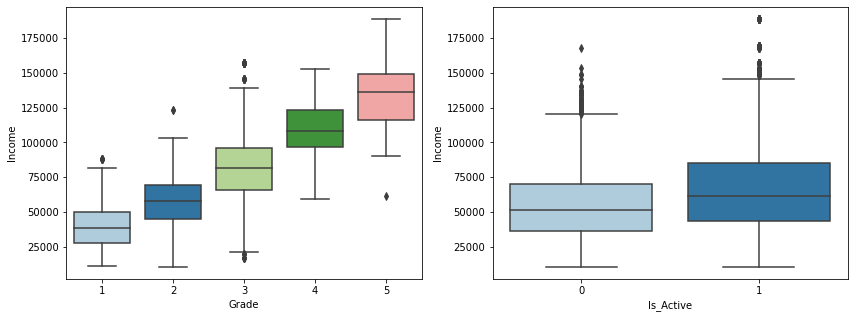

In [29]:
# Boxplot for Grade and Income
fig, axis = plt.subplots(1,2,figsize=(14,5))
sns.boxplot(x=df['Grade'], y=df['Income'], palette='Paired', ax=axis[0])
sns.boxplot(x=df['Is_Active'], y=df['Income'], palette='Paired', ax=axis[1])
plt.show()

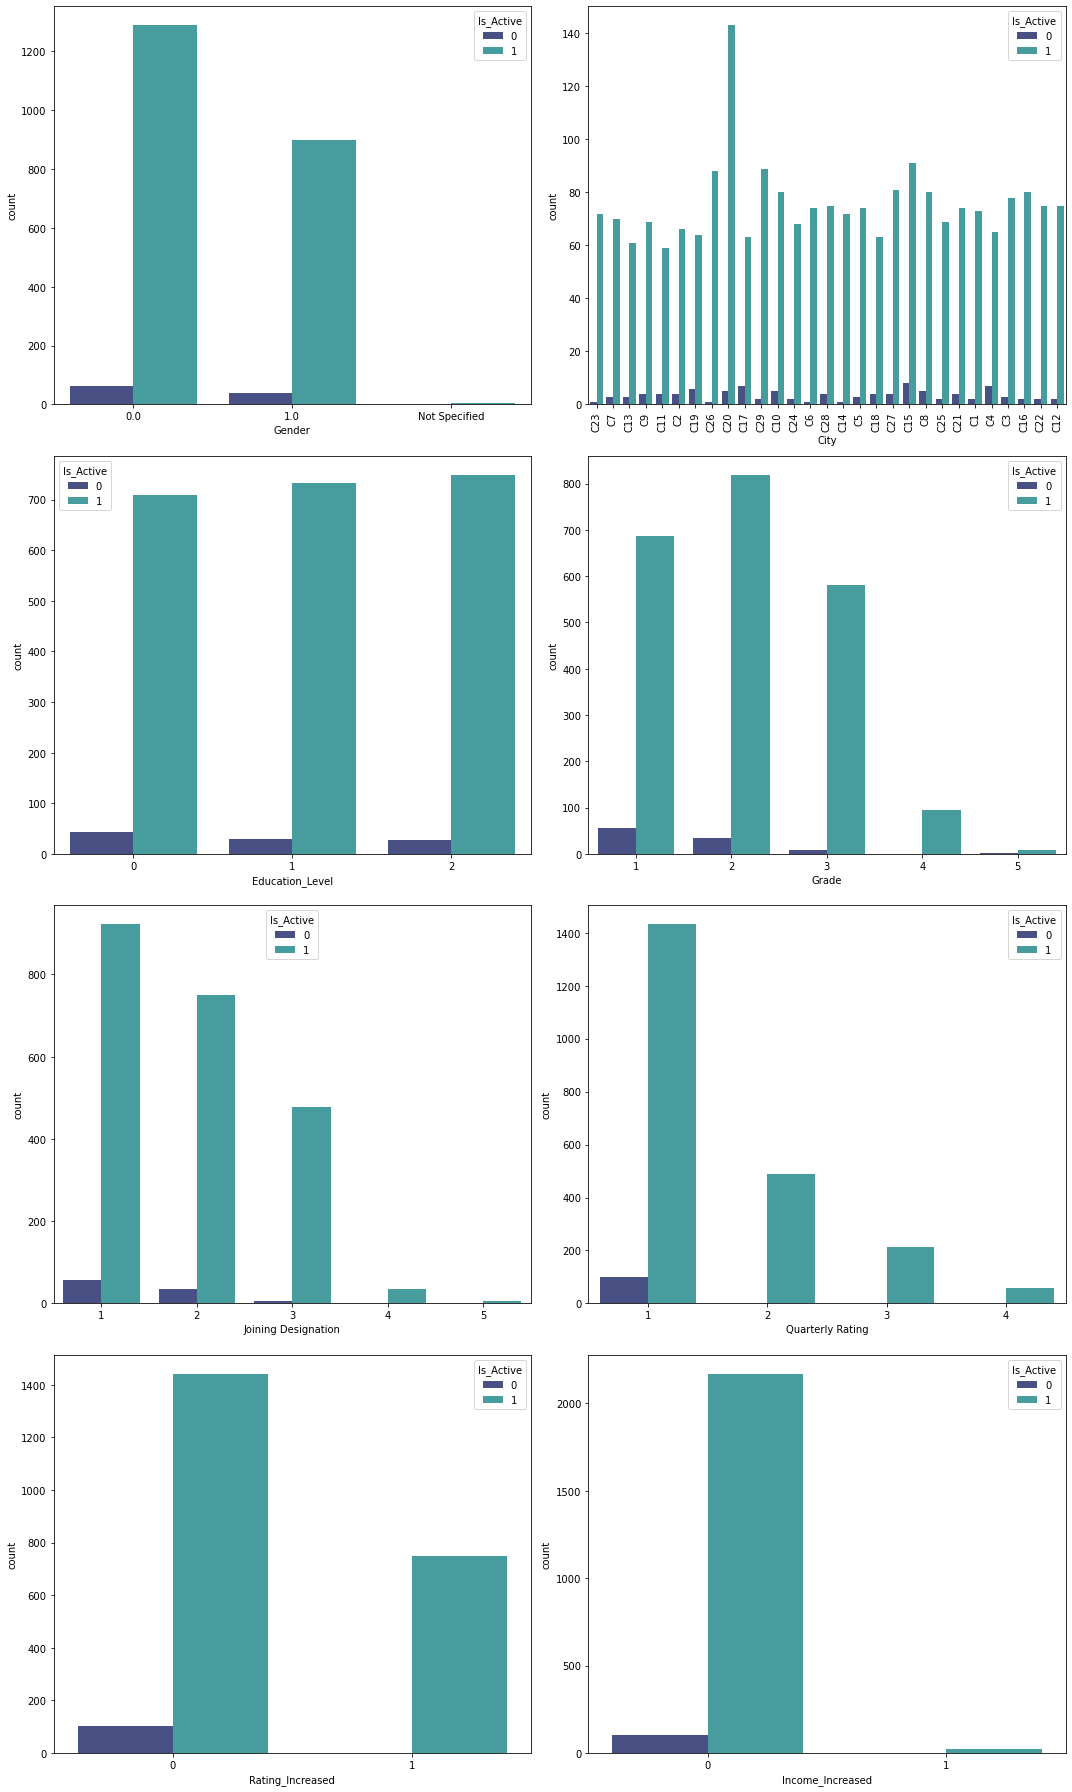

In [30]:
# Figure size
plt.figure(figsize=(15, 25))

# Create a 4x2 grid of subplots
grid_rows = 4
grid_cols = 2
num_plots = grid_rows * grid_cols

# Subplot 1
plt.subplot(grid_rows, grid_cols, 1)
sns.countplot(x='Gender', data=grouped_data, hue='Is_Active', palette='mako')

# Subplot 2
plt.subplot(grid_rows, grid_cols, 2)
sub_grade = sorted(grouped_data.City.unique().tolist())
g = sns.countplot(x='City', data=grouped_data, hue='Is_Active', palette='mako')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Subplot 3
plt.subplot(grid_rows, grid_cols, 3)
sns.countplot(x='Education_Level', data=grouped_data, hue='Is_Active', palette='mako')

# Subplot 4
plt.subplot(grid_rows, grid_cols, 4)
sns.countplot(x='Grade', data=grouped_data, hue='Is_Active', palette='mako')

# Subplot 5
plt.subplot(grid_rows, grid_cols, 5)
sns.countplot(x='Joining Designation', data=grouped_data, hue='Is_Active', palette='mako')

# Subplot 6
plt.subplot(grid_rows, grid_cols, 6)
g = sns.countplot(x='Quarterly Rating', data=grouped_data, hue='Is_Active', palette='mako')

# Subplot 7
plt.subplot(grid_rows, grid_cols, 7)
g = sns.countplot(x='Rating_Increased', data=grouped_data, hue='Is_Active', palette='mako')

# Subplot 8
plt.subplot(grid_rows, grid_cols, 8)
g = sns.countplot(x='Income_Increased', data=grouped_data, hue='Is_Active', palette='mako')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

### Observation

- As a grade of a driver increases the income of the driver also increases.
- Drivers with joining designations 1 and 2 are more likely to stay inactive.
- Average income is higher for the drivers who are currently active compared to those not active.
- Drivers with a quaterly rating 1 are most likely to be inactive.

### One-hot Encoding

In [31]:
# Convert categorical variable to numerical
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Driver_ID             2292 non-null   int64  
 1   Age                   2292 non-null   float64
 2   Gender                2292 non-null   object 
 3   City                  2292 non-null   object 
 4   Education_Level       2292 non-null   int64  
 5   Income                2292 non-null   float64
 6   Joining Designation   2292 non-null   int64  
 7   Grade                 2292 non-null   int64  
 8   Total Business Value  2292 non-null   int64  
 9   Quarterly Rating      2292 non-null   int64  
 10  Rating_Increased      2292 non-null   int32  
 11  Income_Increased      2292 non-null   int32  
 12  Is_Active             2292 non-null   int32  
dtypes: float64(2), int32(3), int64(6), object(2)
memory usage: 288.4+ KB


In [32]:
# Perform one-hot encoding for 'Gender' and 'City'
grouped_data = pd.get_dummies(grouped_data, columns=['Gender', 'City'], drop_first=True)

### Building a bagging model

In [33]:
# Separate the features (X) and the target variable (y)

X = grouped_data.drop("Is_Active", axis=1) # Assuming other columns are features
y = grouped_data["Is_Active"]

In [34]:
X

,Driver_ID,Age,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Rating_Increased,Income_Increased,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,1,28.000000,2,57387.0,1,1,1715580,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,31.000000,2,67016.0,2,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,43.000000,2,65603.0,2,2,350000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,29.000000,0,46368.0,1,1,120360,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6,31.000000,1,78728.0,3,3,1265000,2,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,33.500000,0,82815.0,2,3,21748820,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2377,2785,34.000000,0,12105.0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2378,2786,44.888889,0,35370.0,2,2,2815090,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2379,2787,28.000000,2,69498.0,1,1,977830,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.7352679 , -0.91173217,  1.21122743, ..., -0.18137724,
        -0.19624938, -0.18137724],
       [-1.73402637, -0.38068752,  1.21122743, ...,  5.51337104,
        -0.19624938, -0.18137724],
       [-1.73154329,  1.74349106,  1.21122743, ..., -0.18137724,
        -0.19624938, -0.18137724],
       ...,
       [ 1.72241593,  2.0778525 , -1.23686188, ..., -0.18137724,
        -0.19624938, -0.18137724],
       [ 1.72365746, -0.91173217,  1.21122743, ..., -0.18137724,
        -0.19624938, -0.18137724],
       [ 1.724899  , -0.58299025,  1.21122743, ..., -0.18137724,
        -0.19624938, -0.18137724]])

In [36]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1833, 40)
(459, 40)
(1833,)
(459,)


In [38]:
print("Class Distribution in y_train:")
print(y_train.value_counts())

print("\nClass Distribution in y_test:")
print(y_test.value_counts())

Class Distribution in y_train:
1    1756
0      77
Name: Is_Active, dtype: int64

Class Distribution in y_test:
1    435
0     24
Name: Is_Active, dtype: int64


In [39]:
# Apply SMOTE to the training set only (avoiding data leakage)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [40]:
print("Class Distribution in y_train:")
print(y_train_resampled.value_counts())

Class Distribution in y_train:
1    1756
0    1756
Name: Is_Active, dtype: int64


In [41]:
# Use the class_weight parameter in the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

bagging_model = RandomForestClassifier(random_state=42)

In [42]:
# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [0.5, 'sqrt', 'log2']
}

In [43]:
# Create the GridSearchCV object with the classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

In [44]:
# Train the model on the resampled training set
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': [0.5, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [45]:
# Get the best hyperparameters and the best model from the GridSearchCV
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

In [46]:
# Predict on the testing set
y_pred_bagging = best_rf_model.predict(X_test)

In [47]:
# Evaluate the models
from sklearn.metrics import roc_auc_score, classification_report

roc_auc_bagging = roc_auc_score(y_test, y_pred_bagging)
classification_report_bagging = classification_report(y_test, y_pred_bagging)

print("Results for Bagging (Random Forest):")
print(f'ROC AUC Score: {roc_auc_bagging}')
print(f'Classification Report:\n{classification_report_bagging}')

Results for Bagging (Random Forest):
ROC AUC Score: 0.6274425287356322
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.29      0.30        24
           1       0.96      0.96      0.96       435

    accuracy                           0.93       459
   macro avg       0.63      0.63      0.63       459
weighted avg       0.93      0.93      0.93       459



In [48]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred_bagging)
cm

array([[  7,  17],
       [ 16, 419]], dtype=int64)

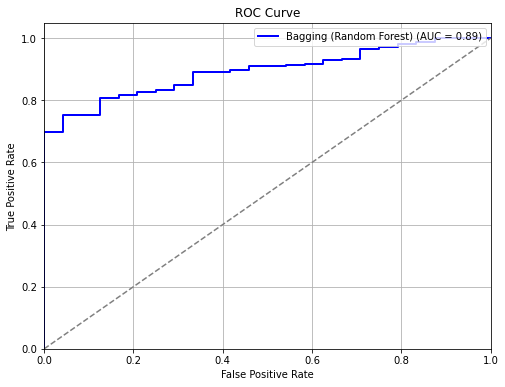

In [49]:
from sklearn.metrics import roc_curve

# Get predicted probabilities for class 1 (positive class)
y_pred_proba_bagging = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr_bagging, tpr_bagging, thresholds_bagging = roc_curve(y_test, y_pred_proba_bagging)

# Calculate the ROC AUC score
roc_auc_bagging = roc_auc_score(y_test, y_pred_proba_bagging)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_bagging, tpr_bagging, color='blue', lw=2, label='Bagging (Random Forest) (AUC = {:.2f})'.format(roc_auc_bagging))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


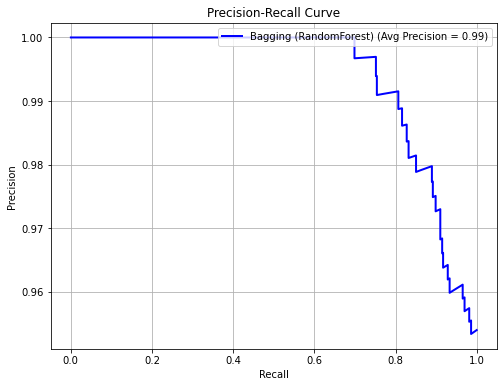

In [50]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_bagging)

# Calculate the average precision score
avg_precision = average_precision_score(y_test, y_pred_proba_bagging)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Bagging (RandomForest) (Avg Precision = {:.2f})'.format(avg_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### Observation

- The overall accuracy of the model is 0.93, which measures the percentage of correctly predicted instances among all the instances. However, considering the class imbalance, accuracy alone may not be the most informative metric.

- The weighted average F1-score is 0.93, which takes into account both class frequencies and performance. It gives more weight to the F1-scores of each class, providing a balanced evaluation of the model's overall performance.

### Boosting model

In [51]:
# Use the class_weight parameter in the model
from sklearn.ensemble import GradientBoostingClassifier

boosting_model = GradientBoostingClassifier(random_state=42)

In [52]:
# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.8, 1.0]
}

In [53]:
# Create the GridSearchCV object with the classifier and hyperparameter grid
grid_search_boost = GridSearchCV(estimator=boosting_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

In [61]:
# Train the model on the resampled training set
grid_search_boost.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='f1')

In [62]:
# Get the best hyperparameters and the best model from the GridSearchCV
best_params = grid_search_boost.best_params_
best_gb_model = grid_search_boost.best_estimator_

In [63]:
# Predict on the testing set
y_pred_boosting = best_gb_model.predict(X_test)

In [64]:
# Evaluate the models
from sklearn.metrics import roc_auc_score, classification_report

roc_auc_boosting = roc_auc_score(y_test, y_pred_boosting)
classification_report_boosting = classification_report(y_test, y_pred_boosting)

print("Results for Boosting (GradientBoosting):")
print(f'ROC AUC Score: {roc_auc_boosting}')
print(f'Classification Report:\n{classification_report_boosting}')

Results for Boosting (GradientBoosting):
ROC AUC Score: 0.5729885057471265
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.17      0.22        24
           1       0.96      0.98      0.97       435

    accuracy                           0.94       459
   macro avg       0.63      0.57      0.59       459
weighted avg       0.92      0.94      0.93       459



In [65]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred_boosting)
cm

array([[  4,  20],
       [  9, 426]], dtype=int64)

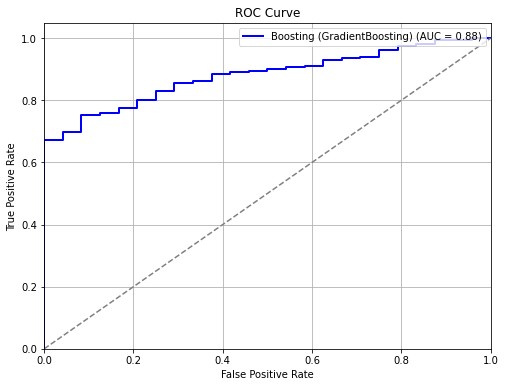

In [66]:
# Get predicted probabilities for class 1 (positive class)
y_pred_proba_boosting = best_gb_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr_boosting, tpr_boosting, thresholds_boosting = roc_curve(y_test, y_pred_proba_boosting)

# Calculate the ROC AUC score
roc_auc_boosting = roc_auc_score(y_test, y_pred_proba_boosting)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_boosting, tpr_boosting, color='blue', lw=2, label='Boosting (GradientBoosting) (AUC = {:.2f})'.format(roc_auc_boosting))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

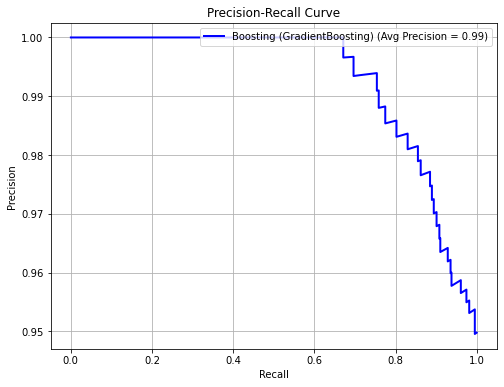

In [67]:
# Calculate the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_boosting)

# Calculate the average precision score
avg_precision = average_precision_score(y_test, y_pred_proba_boosting)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Boosting (GradientBoosting) (Avg Precision = {:.2f})'.format(avg_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### Observation

- The GradientBoosting classifier has excellent performance in correctly identifying positive instances (label 1) with high precision, recall, and F1-score. However, it struggles with classifying negative instances (label 0), resulting in lower performance on the negative class.
- The overall model performance is good based on the high accuracy 0.94 and weighted average F1-score.

### Insights from the analysis

- The dataset contains 19,104 rows and 14 columns with missing values in 'Age' and 'Gender'.
- The majority of employees are males (58.9%) and most are currently active (95.59%).
- Education level 2 (33.9%) and grade 2 (37.22%) are most common among drivers.
- Drivers with joining designation level 1 (42.76%) are the highest, followed by level 2 (34.34%).
- Most drivers received a rating of 1 (66.88%) and a small percentage received rating 4 (2.49%).
- The average income for drivers is approximately 65,652.
- The model's accuracy is 0.93 and weighted average F1-score is 0.93.
- Hyperparameter tuning was performed for Random Forest and Gradient Boosting classifiers.
- Improvement opportunities include handling class imbalance and exploring more feature engineering.

### Recommendations for problem statement

- Implement driver incentive programs based on performance and ratings to motivate drivers to stay with Cab Company.
- Offer competitive rates and benefits to attract and retain drivers, making Cab Company a more attractive option compared to competitors.
- Provide comprehensive driver training and ongoing support to enhance skills and job satisfaction.
- Collect regular feedback from drivers and engage with them to address concerns and foster a sense of belonging.
- Build predictive churn models to identify drivers at risk of leaving and take proactive retention actions.
- Tailor retention strategies based on individual driver attributes and reasons for potential churn.
- Focus on improving the overall driver experience with streamlined processes and user-friendly technology.
- Implement loyalty programs to reward long-term drivers and foster commitment.
- Conduct exit surveys to understand the reasons for driver departures and make targeted improvements.
- Maintain regular communication with drivers to keep them informed and engaged with the company.
